# Approximation to BSM Option Valuation by CRR

**Ref** Chap 5 of [Hil15]

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

### CRR Option Pricing

In 1979, Cox, Ross and Rubinstein presented (cf. Cox et al. (1979)) their binomial option pricing model. This model assumes in principle a BSM economy but in discrete time with discrete state space. Whereas the BSM model necessitates advanced mathematics and the handling of partial differential equations (PDE), the CRR analysis relies on fundamental probabilistic concepts only. Their representation of uncertainty by binomial (recombining) trees is still today the tool of choice when one wishes to illustrate option topics in a simple, intuitive way. Furthermore, their numerical approach allows not only European options but also American options to be valued quite as easily.

We denote CRR model by
$$\mathcal M^{CRR} = \{(\Omega, \mathcal F, \mathbb F, \mathbb P), T, (S, B)\}.$$
The time horizon is
$$t\in \{0, \Delta t, \ldots, T\}:= \mathbb T.$$
Bond price follows binomial tree
$$B_t = e^{-r (T-t)}.$$
Stock price follows
$$S_{t+\Delta t} = S_t \cdot m_t$$
where $m_t \in \{u, d\}$ is a random variable with two possible values with
$$u = e^{\sigma \sqrt{\Delta t}}, d = e^{- \sigma \sqrt{\Delta t}}.$$

**[A1]** $\sigma > r$. 

Under [A1], there exists unique risk-neutral probability $\mathbb Q$ given by
$$q = \mathbb Q(m_t = u) = \frac{e^{r\Delta t} - d}{u - d}, \quad 1- q = \mathbb Q(m_t = d)$$
such that, the discounted stock price $\{e^{-rt} S_t: t \in \mathbb T\}$ is a martingale.

**[Q]** 
If [A1] is violated, then does it still make the model arbitrage free?

CRR call value can be evaluated backwardly from
$$C_0 = e^{-rT} \mathbb E_0^{\mathbb Q} [C_T].$$

We shall use the following parameters as our example.

In [2]:
%reset -f
# Model Parameters
#
S0 = 100.0  # index level
K = 100.0  # option strike
T = 1.0  # maturity date
r = 0.05  # risk-less short rate
sigma = 0.2  # volatility

We use BSM option value as its benchmark

In [3]:
from BSM_option_valuation import *
BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
BSM_benchmark

10.450583572185565

In [4]:
%run CRR_option_valuation.py
#%cat CRR_option_valuation.py #read code

In [5]:
#Except BSM paras, we shall assign $M$ for the number of time steps in $[t, T]$
%time CRR_option_value(S0, K, T, r, sigma, 'call', M=2000)

CPU times: user 308 ms, sys: 63.8 ms, total: 372 ms
Wall time: 384 ms


10.449583775457942

CPU times: user 1.73 s, sys: 297 ms, total: 2.02 s
Wall time: 2.07 s


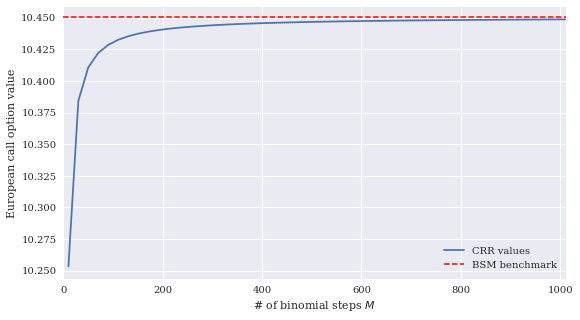

In [6]:
%%time
mmin = 10
mmax = 1011
stepsize = 20
# This computes CRR evaluation with M = mmin + stepsize*k not exceeding mmax for all integer k 
plot_convergence(mmin, mmax, stepsize) 
plt.savefig('CRR_convergence_1.pdf')

CPU times: user 1.34 s, sys: 309 ms, total: 1.65 s
Wall time: 1.69 s


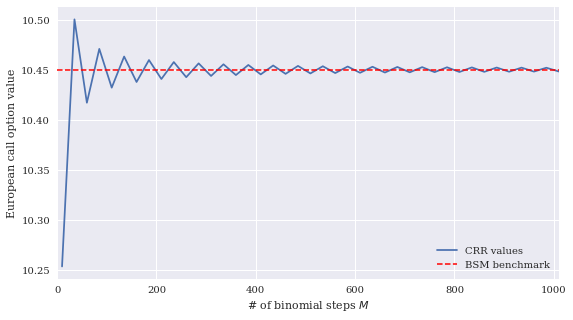

In [7]:
%%time
plot_convergence(10, 1011, 25)
plt.savefig('CRR_convergence_2.pdf')

**[Q??]**
- Why does CRR converge to BSM as the number of steps $M$ is getting bigger?
- In the above, when step size is 25, the convergence is zig-zag, while 20, it is smoothly monotone. Why?